## Inferential Statistics
- Null hypothesis:
Assumption that there is no relationship between the independent and dependent variables
- Alternative hypothesis:
Not the null hypothesis
- Standard Prob +- 0.05:
To be statistically significant, you must have a p-value of < 0.05
- Tests:

Test       Actual
- True    Positive    ?
- True    Negative    ?
- False   Positive    (Test I Error) - Test came back saying you don't have it but you actually do
- False   Negative    (Test II Error) - Your test back saying you have it but you actually don't

# Titanic Passenger List DF

## Chi-Squared Analysis

### First Question: Did more women and children survive compared to men?

#### Dataset from Canvas (Titanic Passenger List.csv)

In [2]:
import pandas as pd

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


- What kind of data is the `dependent` variable?
    - We'll use `Lived_Died` and it's categorical or nominal
- What kind of data is the `gender` (indep. variable)?
    - Overall there are Two Types:
        - `Ordinal` data. Data that can be ordered
        - `Categorical/nominal`. Data the can not be ordered
    - `Gender` is nominal
    

In [3]:
# Margins = True will show the summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
contingency_nomarg = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'])
print(contingency_table)

Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


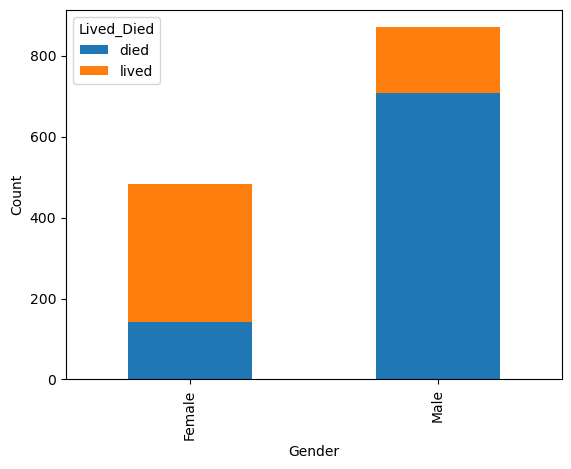

In [4]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died
import matplotlib.pyplot as plt

# contingency_table.plot(kind='bar', stacked=True) - don't like this because it includes the totals
# use iloc to exclude the last column and row from contingency_table
# contingency_table.iloc[:-1,:-1].plot(kind='bar', stacked=True)
# or use no margin table
contingency_nomarg.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.show()

In [5]:
from scipy import stats # for chi2_contigency

print(stats.chi2_contingency(contingency_nomarg)[0:3])

# You get 3 values back
# 1- Chi-Squared: The higher the chi-squared statistics, the less likelihood that the observed values were the result of pure chance
# 2- Target P-value
# Degrees of freedom: 1 degree of freedom. (r rows - 1) * (r columns -1) = 1

(355.24355436145913, 3.0570688722545846e-79, 1)


## Chi-Square Example: Was Age Relevant?

In [6]:
# Check the age column. Make sure it's the age at the time of the incident 
# Clean up first. Get rid of NaN
passenger_df_c = passenger_df
passenger_df_c.dropna(subset=['Age'], inplace=True)


In [7]:
passenger_df_c.tail()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
1323,"ARTAGAVEYTIA, Mr Ramon",1840.0,1912.0,71.0,Male,1,died,£49 10s 1d,49.50
1324,"GOLDSCHMIDT, Mr George B.",1840.0,1912.0,71.0,Male,1,died,£34 13s 1d,34.65
1325,"MITCHELL, Mr Henry Michael",1840.0,1912.0,71.0,Male,2,died,£10 10s,10.50
1326,"KIRKLAND, Fr Charles Leonard",1841.0,1912.0,71.0,Male,2,died,£12 7s,12.35
1327,"SVENSSON, Mr Johan",1837.0,1912.0,74.0,Male,3,died,£7 15s 6d,7.78


In [9]:
# Create bins
# detail out your bins
# passenger_df_c['age_bins'] = pd.cut(x=passenger_df_c['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
# use a range for your bins
passenger_df_c['age_bins'] = pd.cut(x=passenger_df_c['Age'], bins=range(0,90,10))

contingency_table = pd.crosstab(passenger_df_c['age_bins'], passenger_df_c['Lived_Died'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Lived_Died  died  lived
age_bins               
(0, 10]       46     54
(10, 20]     156     71
(20, 30]     286    166
(30, 40]     158    107
(40, 50]     111     64
(50, 60]      40     30
(60, 70]      27      7
(70, 80]       5      0
Chi2-Stats (24.465546982751874, 0.0009433264132943263, 7)


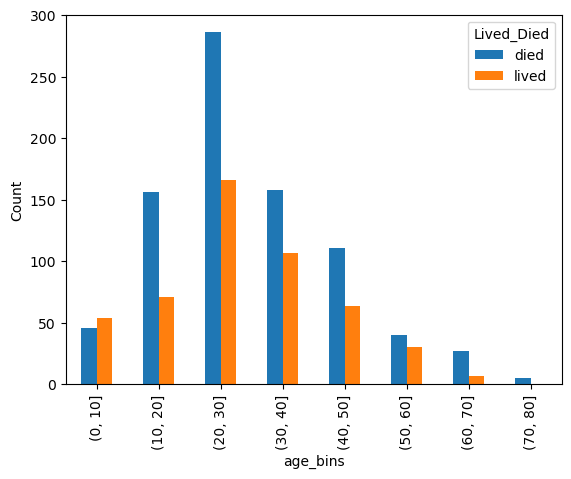

In [35]:
contingency_table.plot(kind='bar')
plt.ylabel('Count')
plt.show()

C:\Users\stacieleavitt1\AppData\Local\Temp\ipykernel_12224\1285771916.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])
C:\Users\stacieleavitt1\AppData\Local\Temp\ipykernel_12224\1285771916.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, '0-9'),
  Text(1.5, 0, '10-19'),
  Text(2.5, 0, '20-29'),
  Text(3.5, 0, '30-39'),
  Text(4.5, 0, '40-49'),
  Text(5.5, 0, '50-59'),
  Text(6.5, 0, '60-69'),
  Text(7.5, 0, '70-79')])

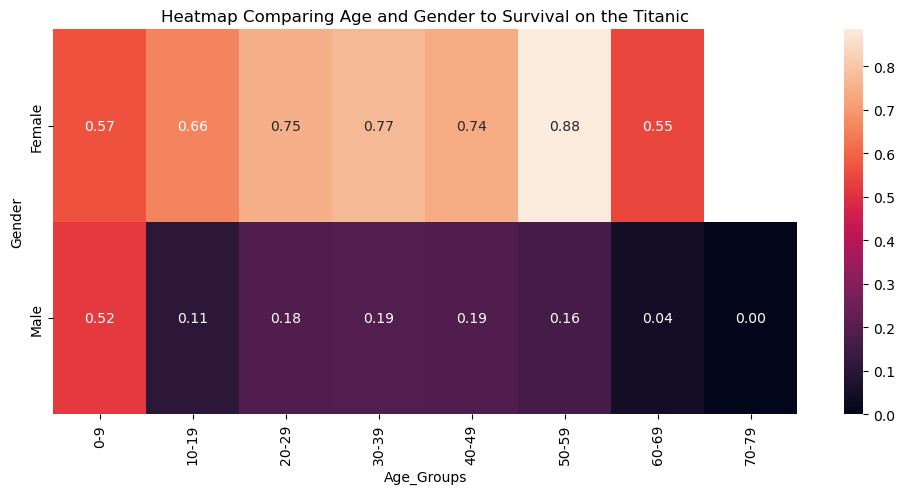

In [6]:
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

#Drop collumns you don't need
passenger_df.drop(['Name','Born','Died','Fare', 'Fare_decimal', 'Passenger_Class'], axis=1, inplace=True)
passenger_df.dropna(inplace=True) # Drop null values

# Encode the categorical data
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['Age_Groups'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10)) # Create bins

# Use a pivot table
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups'])
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap

# Create a Heatmap
plt.figure(figsize=(12,5))
x_axis_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic')
plt.xticks(rotation=90)

## Task: Did the Titanic Passenger Class affect Survivorship?


In [16]:
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats # for chi2_contigency

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

In [17]:
passenger_df.head()


,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


In [18]:
passenger_df['Passenger_Class'].unique()

array([3, 2, 1], dtype=int64)

In [22]:
# Create a Bar Plot with the data stacked
contingency_table = pd.crosstab(passenger_df['Lived_Died'], passenger_df['Passenger_Class'], margins=True)

print(contingency_table)

Passenger_Class    1    2    3   All
Lived_Died                          
died             149  175  528   852
lived            201  118  181   500
All              350  293  709  1352


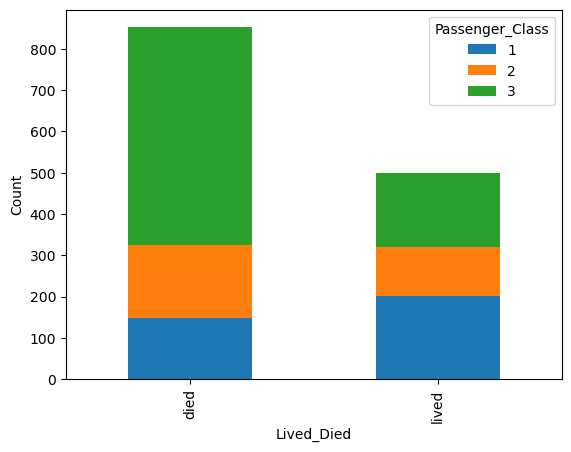

In [26]:
contingency_table = pd.crosstab(passenger_df['Lived_Died'], passenger_df['Passenger_Class'], margins=False)
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.show()

In [27]:
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')

Chi2-Stats (104.05195288933228, 2.543346399916496e-23, 2)


Which passenger class is responsible for the significant difference in survival rate?
- Chi-Square test offers that at least `one` of the passenger class is different from what we would expect if the variables were independent. 
- Since this is our first test, it is considered a `Priori Test`
- To continue our analysis, we will run another test, a `Post Hoc` test

### Post-Hoc Test (Fisher's Exact Test)

- Compare every passenger class to every other class to see if there is statistical significance between the two. 
- We could apply a separate Chi-square test for each of the three separate comparisons, but our sample data is too small.
- In this case, `Fisher's Exact` test is a better option 

In [32]:
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats # for chi2_contigency

# Load data
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

# Create new table without margins
contingency_table = pd.crosstab(passenger_df['Passenger_Class'], passenger_df['Lived_Died'], margins=False)
print(contingency_table)

Lived_Died       died  lived
Passenger_Class             
1                 149    201
2                 175    118
3                 528    181


In [33]:
# Extract row values
first_class = contingency_table.iloc[0].values 
sec_class = contingency_table.iloc[1].values 
third_class = contingency_table.iloc[2].values 

# Create a Fishers Exact test to determine if there is a relationship between passenger class and survival
oddsratio, pvalue = stats.fisher_exact([first_class, sec_class])
print(f'Fishers Exact Test for First and Second Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([first_class, third_class])
print(f'Fishers Exact Test for First and Second Class: {pvalue}')

oddsratio, pvalue = stats.fisher_exact([sec_class, third_class])
print(f'Fishers Exact Test for First and Second Class: {pvalue}')

Fishers Exact Test for First and Second Class: 1.827149276703859e-05
Fishers Exact Test for First and Second Class: 7.457205699022123e-24
Fishers Exact Test for First and Second Class: 5.007621820657881e-06


Each of the Fisher's Test revealed statistical significance between the 3 classes

Another way to conceptualize the result is to look at percentages:

| Passenger Class  |  Died  |
|------------------|--------|
| First Class      |  43%   |
| Second Class     |  60%   |
| Third Class      |  74%   |

TODO: Create a heatmap of Passenger Class split in Age_Range by Gender and Survival Rate

C:\Users\stacieleavitt1\AppData\Local\Temp\ipykernel_12224\1314138561.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups', 'Passenger_Class'])
C:\Users\stacieleavitt1\AppData\Local\Temp\ipykernel_12224\1314138561.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table.applymap(lambda x: 1-x) # invert values in heatmap


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'PC 1: 0-9'),
  Text(1.5, 0, 'PC 1: 10-19'),
  Text(2.5, 0, 'PC 1: 20-29'),
  Text(3.5, 0, 'PC 1: 30-39'),
  Text(4.5, 0, 'PC 1: 40-49'),
  Text(5.5, 0, 'PC 1: 50-59'),
  Text(6.5, 0, 'PC 1: 60-69'),
  Text(7.5, 0, 'PC 1: 70-79'),
  Text(8.5, 0, 'PC 2: 0-9'),
  Text(9.5, 0, 'PC 2: 10-19'),
  Text(10.5, 0, 'PC 2: 20-29'),
  Text(11.5, 0, 'PC 2: 30-39'),
  Text(12.5, 0, 'PC 2: 40-49'),
  Text(13.5, 0, 'PC 2: 50-59'),
  Text(14.5, 0, 'PC 2: 60-69'),
  Text(15.5, 0, 'PC 2: 70-79'),
  Text(16.5, 0, 'PC 3: 0-9'),
  Text(17.5, 0, 'PC 3: 10-19'),
  Text(18.5, 0, 'PC 3: 20-29'),
  Text(19.5, 0, 'PC 3: 30-39'),
  Text(20.5, 0, 'PC 3: 40-49'),
  Text(21.5, 0, 'PC 3: 50-59'),
  Text(22.5, 0, 'PC 3: 60-69'),
  Text(23.5, 0, 'PC 3: 70-79')])

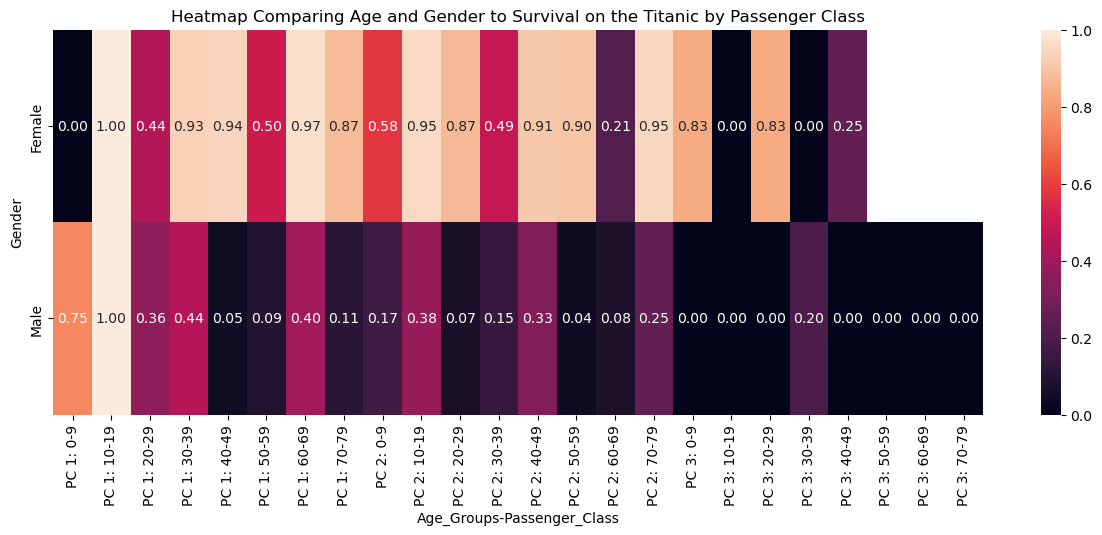

In [35]:
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

#Drop collumns you don't need
passenger_df.drop(['Name','Born','Died','Fare', 'Fare_decimal'], axis=1, inplace=True)
passenger_df.dropna(inplace=True) # Drop null values

# Encode the categorical data
le = preprocessing.LabelEncoder()
passenger_df['Lived_Died_int'] = le.fit_transform(passenger_df['Lived_Died'])
passenger_df['Age_Groups'] = pd.cut(x=passenger_df['Age'], bins=range(0,90,10)) # Create bins

# Use a pivot table
pivot_table = pd.pivot_table(passenger_df, values='Lived_Died_int', index=['Gender'], columns=['Age_Groups', 'Passenger_Class'])
pivot_table.applymap(lambda x: 1-x) # invert values in heatmap

# Create a Heatmap
plt.figure(figsize=(15,5))
x_axis_labels = [
    'PC 1: 0-9', 'PC 1: 10-19', 'PC 1: 20-29', 'PC 1: 30-39', 'PC 1: 40-49', 'PC 1: 50-59', 'PC 1: 60-69', 'PC 1: 70-79',
    'PC 2: 0-9', 'PC 2: 10-19', 'PC 2: 20-29', 'PC 2: 30-39', 'PC 2: 40-49', 'PC 2: 50-59', 'PC 2: 60-69', 'PC 2: 70-79',
    'PC 3: 0-9', 'PC 3: 10-19', 'PC 3: 20-29', 'PC 3: 30-39', 'PC 3: 40-49', 'PC 3: 50-59', 'PC 3: 60-69', 'PC 3: 70-79'
                 ]
sns.heatmap(pivot_table, annot=True, yticklabels=['Female', 'Male'], xticklabels=x_axis_labels, fmt='.2f', cmap='rocket')
plt.title('Heatmap Comparing Age and Gender to Survival on the Titanic by Passenger Class')
plt.xticks(rotation=90)

### T-Test: Fare and Gender

While `Chi-Test` and `Fisher-Test` focus on `categorical` discrete dependent variable, the `T-test` and `ANOVA` test, target `continuous` data

#### How was Fare (price of passage) affected by Gender and Passenger Class?
- Did one gender pay more than the other?
- Is there a difference in fare between passenger classes?
- Is there an interaction between gender and passenger class on the resulting fare?

In [36]:
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')

Text(0.5, 1.0, 'Amount of Fare paid based on Gender')

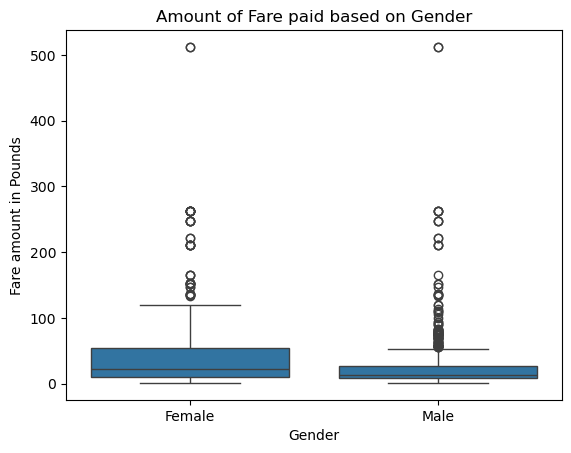

In [37]:
# Visualize data using boxplot
sns.boxplot(y = passenger_df['Fare_decimal'], x = passenger_df['Gender'])
plt.ylabel('Fare amount in Pounds')
plt.title('Amount of Fare paid based on Gender')

In [38]:
male = passenger_df[passenger_df['Gender'] == 'Male']
print(f'Male Summary {male['Fare_decimal'].describe()}')

Male Summary count    839.000000
mean      26.226067
std       42.514485
min        1.000000
25%        7.895000
50%       12.350000
75%       26.550000
max      512.330000
Name: Fare_decimal, dtype: float64


In [39]:
female = passenger_df[passenger_df['Gender'] == 'Female']
print(f'Female Summary {female['Fare_decimal'].describe()}')

Female Summary count    482.000000
mean      45.118299
std       63.149875
min        1.000000
25%       10.460000
50%       21.555000
75%       54.525000
max      512.330000
Name: Fare_decimal, dtype: float64


In [40]:
from scipy.stats import ttest_ind
# Drop null values in order to run ttest
passenger_df.dropna(inplace=True)
male = passenger_df[passenger_df['Gender'] == 'Male'] # recreate from filtered df
female = passenger_df[passenger_df['Gender'] == 'Female']

# Run the test
statistics, pvalue = ttest_ind(male['Fare_decimal'], female['Fare_decimal'])
print(f'T-Test for Fare Paid p-value: {pvalue}')

T-Test for Fare Paid p-value: 6.093364811911871e-13
